In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.default_rng(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

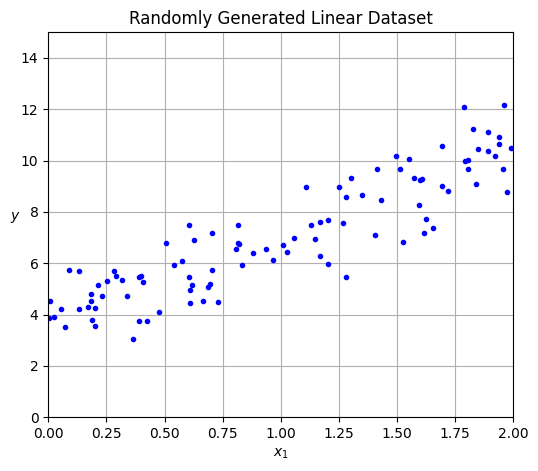

In [3]:
plt.figure(figsize=(6, 5))
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title("Randomly Generated Linear Dataset")
plt.axis([0,2,0,15])
plt.grid()
plt.show()

Normalize Equation for fitting Line

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta

array([[3.73430071],
       [3.32745496]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta
y_predict

array([[ 3.73430071],
       [10.38921063]])

Visual this prediction

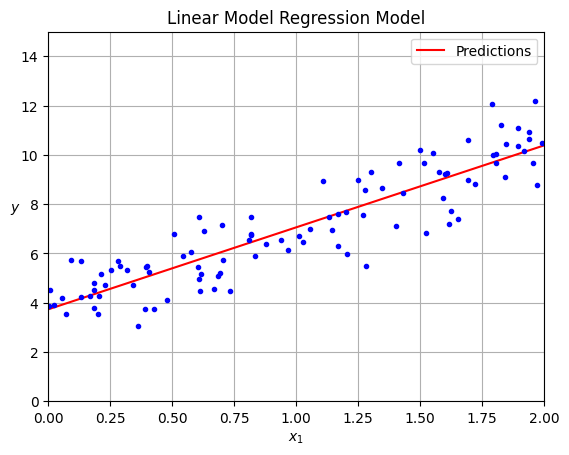

In [7]:
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title("Linear Model Regression Model")
plt.grid()
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_reg.intercept_, linear_reg.coef_

(array([3.73430071]), array([[3.32745496]]))

In [9]:
linear_reg.predict(X_new)

array([[ 3.73430071],
       [10.38921063]])

Linear Regression is class based function of scipy.linalg.lstsq(), stands for "Least Squares"

In [10]:
# This is as:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.73430071],
       [3.32745496]])

# Gradient Descent
## Batch Gradient Descent

* Gradient vector of cost function
* Gradient descent step

In [11]:
eta = 0.1 # Learning Rate
n_epochs = 1000
m = len(X_b) # number of instances 

np.random.default_rng(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[3.73430071],
       [3.32745496]])

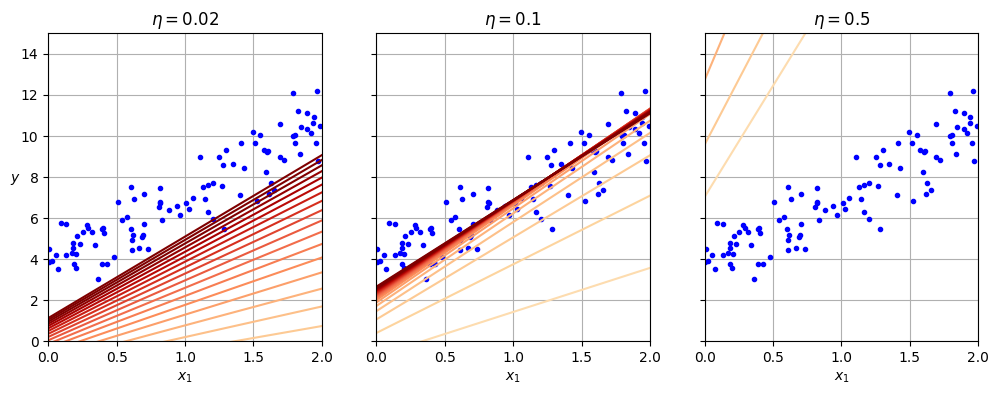

In [13]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta 
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color, linestyle='solid')
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0,2,0,15])
    plt.grid()
    plt.title(fr'$\eta= {eta}$')
    return theta_path

np.random.default_rng(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0)

plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)
plt.gca().yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.show()


In [14]:
theta_path_sgd = []

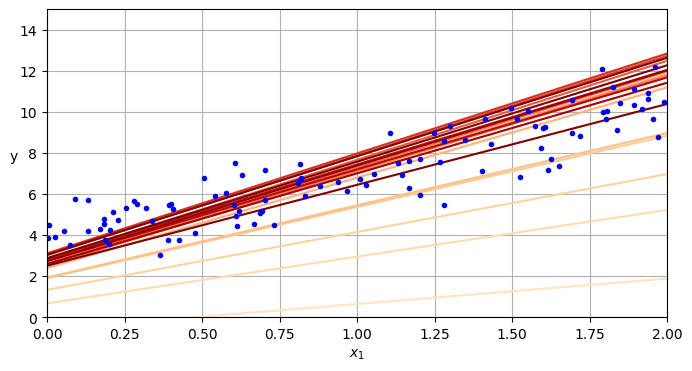

In [15]:
n_epochs = 50
t0, t1 = 5, 50


def learning_schedule(t):
    return t0 / (t + t1)

n_shown = 20
plt.figure(figsize=(8, 4))

np.random.default_rng(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # SGD does not requires division of m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.show()

In [16]:
theta

array([[3.72978151],
       [3.32828344]])

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(
    max_iter=1000,
    tol=1e-5,
    penalty=None,
    eta0=0.01,
    n_iter_no_change=100,
    random_state=42,
)

sgd_regressor.fit(X, y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [18]:
sgd_regressor.intercept_, sgd_regressor.coef_

(array([3.73348812]), array([3.3267116]))

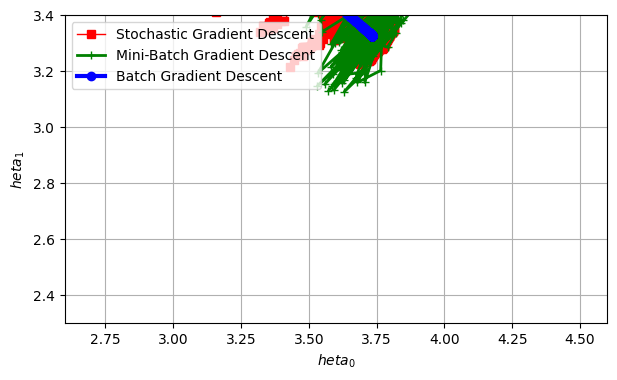

In [19]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.default_rng(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000


def learning_schedule(t):
    return t0 / (t + t1)


theta_path_mgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(
    theta_path_sgd[:, 0],
    theta_path_sgd[:, 1],
    "r-s",
    linewidth=1,
    label="Stochastic Gradient Descent",
)
plt.plot(
    theta_path_mgd[:, 0],
    theta_path_mgd[:, 1],
    "g-+",
    linewidth=2,
    label="Mini-Batch Gradient Descent",
)
plt.plot(
    theta_path_bgd[:, 0],
    theta_path_bgd[:, 1],
    "b-o",
    linewidth=3,
    label="Batch Gradient Descent",
)


plt.legend(loc="upper left")
plt.xlabel("$\theta_0$")
plt.ylabel("$\theta_1$")
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

## Polynomial Regression

In [20]:
# Generating Non-Linear Data:
np.random.default_rng(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [21]:
X

array([[-1.53877245],
       [ 0.5383819 ],
       [ 2.26238281],
       [-0.18372902],
       [ 2.16884602],
       [-0.98246132],
       [ 2.06322557],
       [ 1.73838031],
       [ 1.03652888],
       [ 1.42996105],
       [ 0.66330965],
       [ 0.91786726],
       [-0.78554949],
       [-1.01296293],
       [ 1.18292418],
       [-2.38070103],
       [ 1.65732525],
       [ 0.45317424],
       [-0.91117908],
       [ 0.7078789 ],
       [ 0.92466837],
       [ 1.66170108],
       [-2.97527635],
       [-0.90388933],
       [-0.19220038],
       [-1.82488643],
       [-1.21959968],
       [ 0.90008341],
       [-2.45372127],
       [-1.65205536],
       [ 0.06734845],
       [ 0.32955882],
       [-2.94397261],
       [-2.05401906],
       [-0.78567604],
       [ 1.63847747],
       [ 1.59808337],
       [-1.24081485],
       [ 1.14331025],
       [ 0.74411984],
       [ 0.83246725],
       [ 0.88852315],
       [ 2.91930984],
       [ 1.46029728],
       [ 0.54226289],
       [ 0

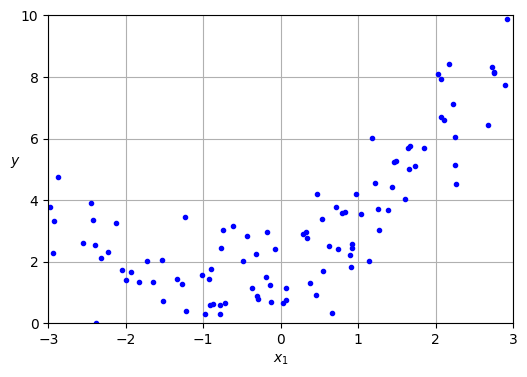

In [22]:
plt.figure(figsize=(6,4))
plt.plot(X, y, 'b.')
plt.axis([-3,3,0,10])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [24]:
X[0]

array([-1.53877245])

In [25]:
X_poly[0]

array([-1.53877245,  2.36782066])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
lin_reg.intercept_, lin_reg.coef_

(array([1.83987795]), array([[0.98216361, 0.51618805]]))

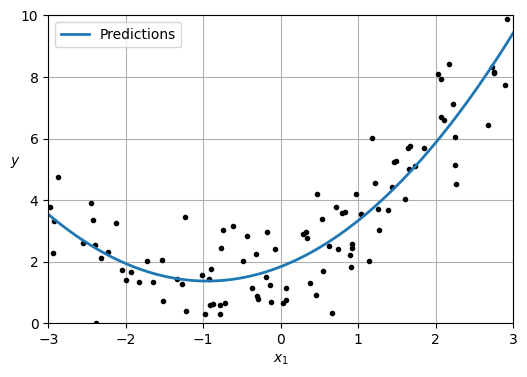

In [28]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6,4))
plt.plot(X, y, 'k.')
plt.plot(X_new, y_new, '-', linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(7,7))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    pass